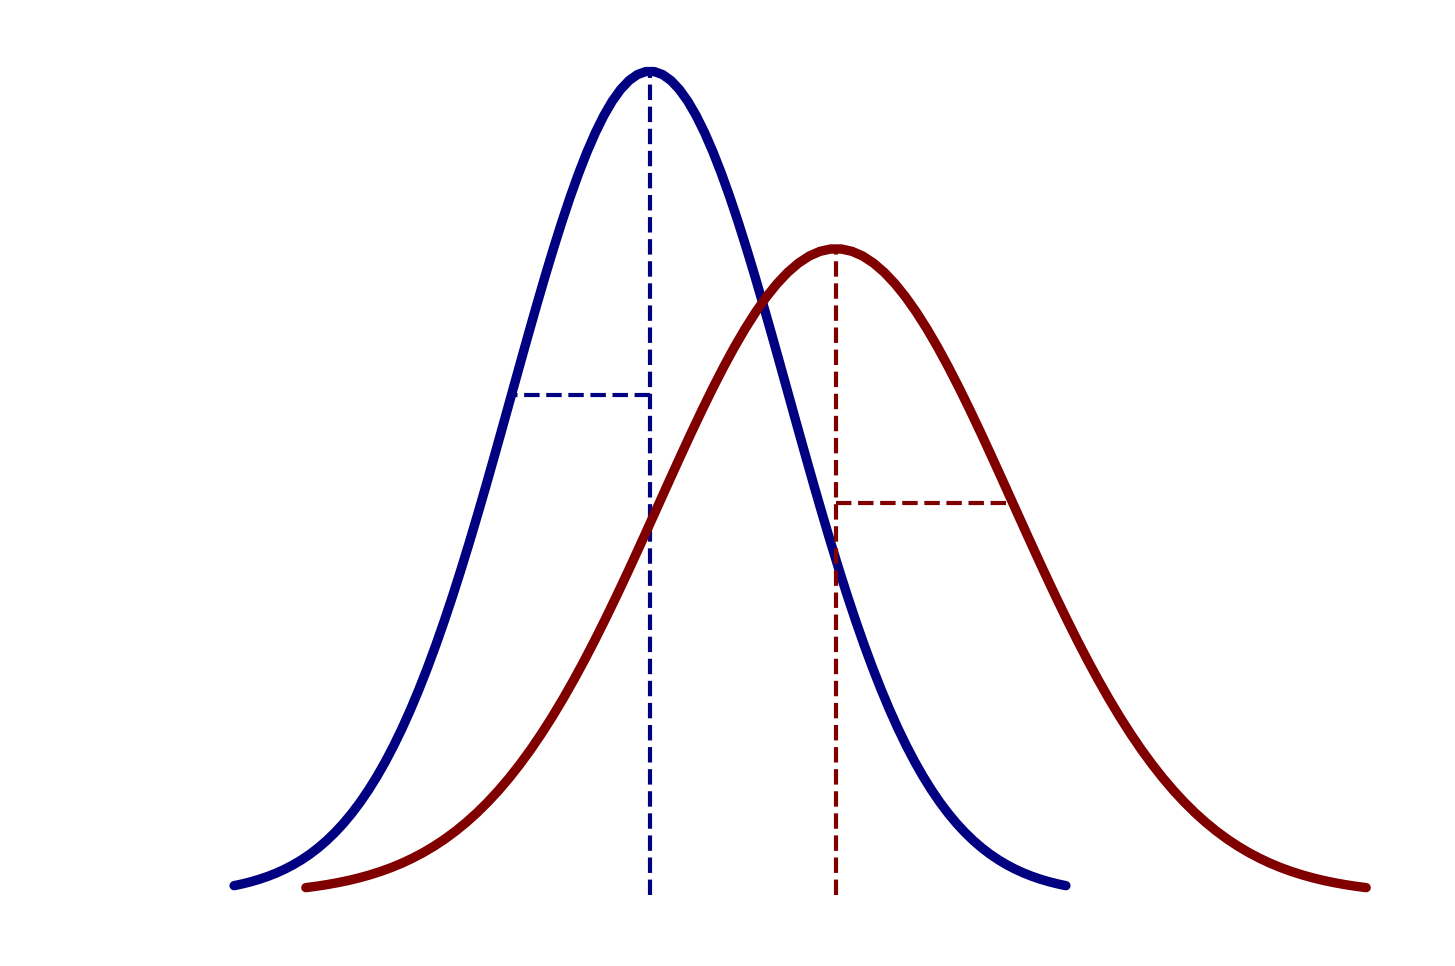

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.dpi'] = 300


mu = 0
variance = 0.8
mu2 = 1.2
variance2 = 1.3

sigma = math.sqrt(variance)
sigma2 = math.sqrt(variance2)
plt.xlim([-4,5])
x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x1, stats.norm.pdf(x1, mu, sigma), color='navy')

plt.plot([mu, mu-sigma], [stats.norm.pdf(mu-sigma, mu, sigma), 
                          stats.norm.pdf(mu-sigma, mu, sigma)], '--', color='navy', linewidth=1)
plt.plot([mu, mu], [0, stats.norm.pdf(mu, mu, sigma)], '--', color='navy', linewidth=1)

plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2), color='maroon')
plt.plot([mu2, mu2+sigma2], [stats.norm.pdf(mu2+sigma2, mu2, sigma2), 
                          stats.norm.pdf(mu2+sigma2, mu2, sigma2)], '--', color='maroon', linewidth=1)
plt.plot([mu2, mu2], [0, stats.norm.pdf(mu2, mu2, sigma2)], '--', color='maroon', linewidth=1)
plt.axis('off')
plt.show()

In [4]:
import pandas as pd
# trained models + resulting CSV files available at: results_/models_for_learning_curve
df = pd.read_csv('data_for_learning_curve.csv')
df

,N_molecule(Train),Trial1,Trial2,Trial3,avg_test_set_MAE,std_test_set_MAE
0,600,7.790616,7.811739,7.844023,7.815459,0.026897
1,1200,6.061650,6.097318,6.222372,6.127113,0.084402
2,1800,5.631456,6.063286,5.771916,5.822219,0.220266
3,2400,5.424542,5.619949,5.571109,5.538533,0.101695
4,3000,5.363452,5.690606,5.291649,5.448569,0.212662
5,3600,5.536194,5.497919,5.446333,5.493482,0.045094
6,4200,5.294657,5.259056,5.295052,5.282922,0.020669
7,4800,5.214166,5.189589,5.076581,5.160112,0.073376
8,5400,5.188124,5.091506,5.202871,5.160833,0.060491
9,5994,4.770000,4.745693,4.883910,4.799868,0.073791


Text(60.625000000000014, 0.5, 'MAE (Test set, kJ/mol)')

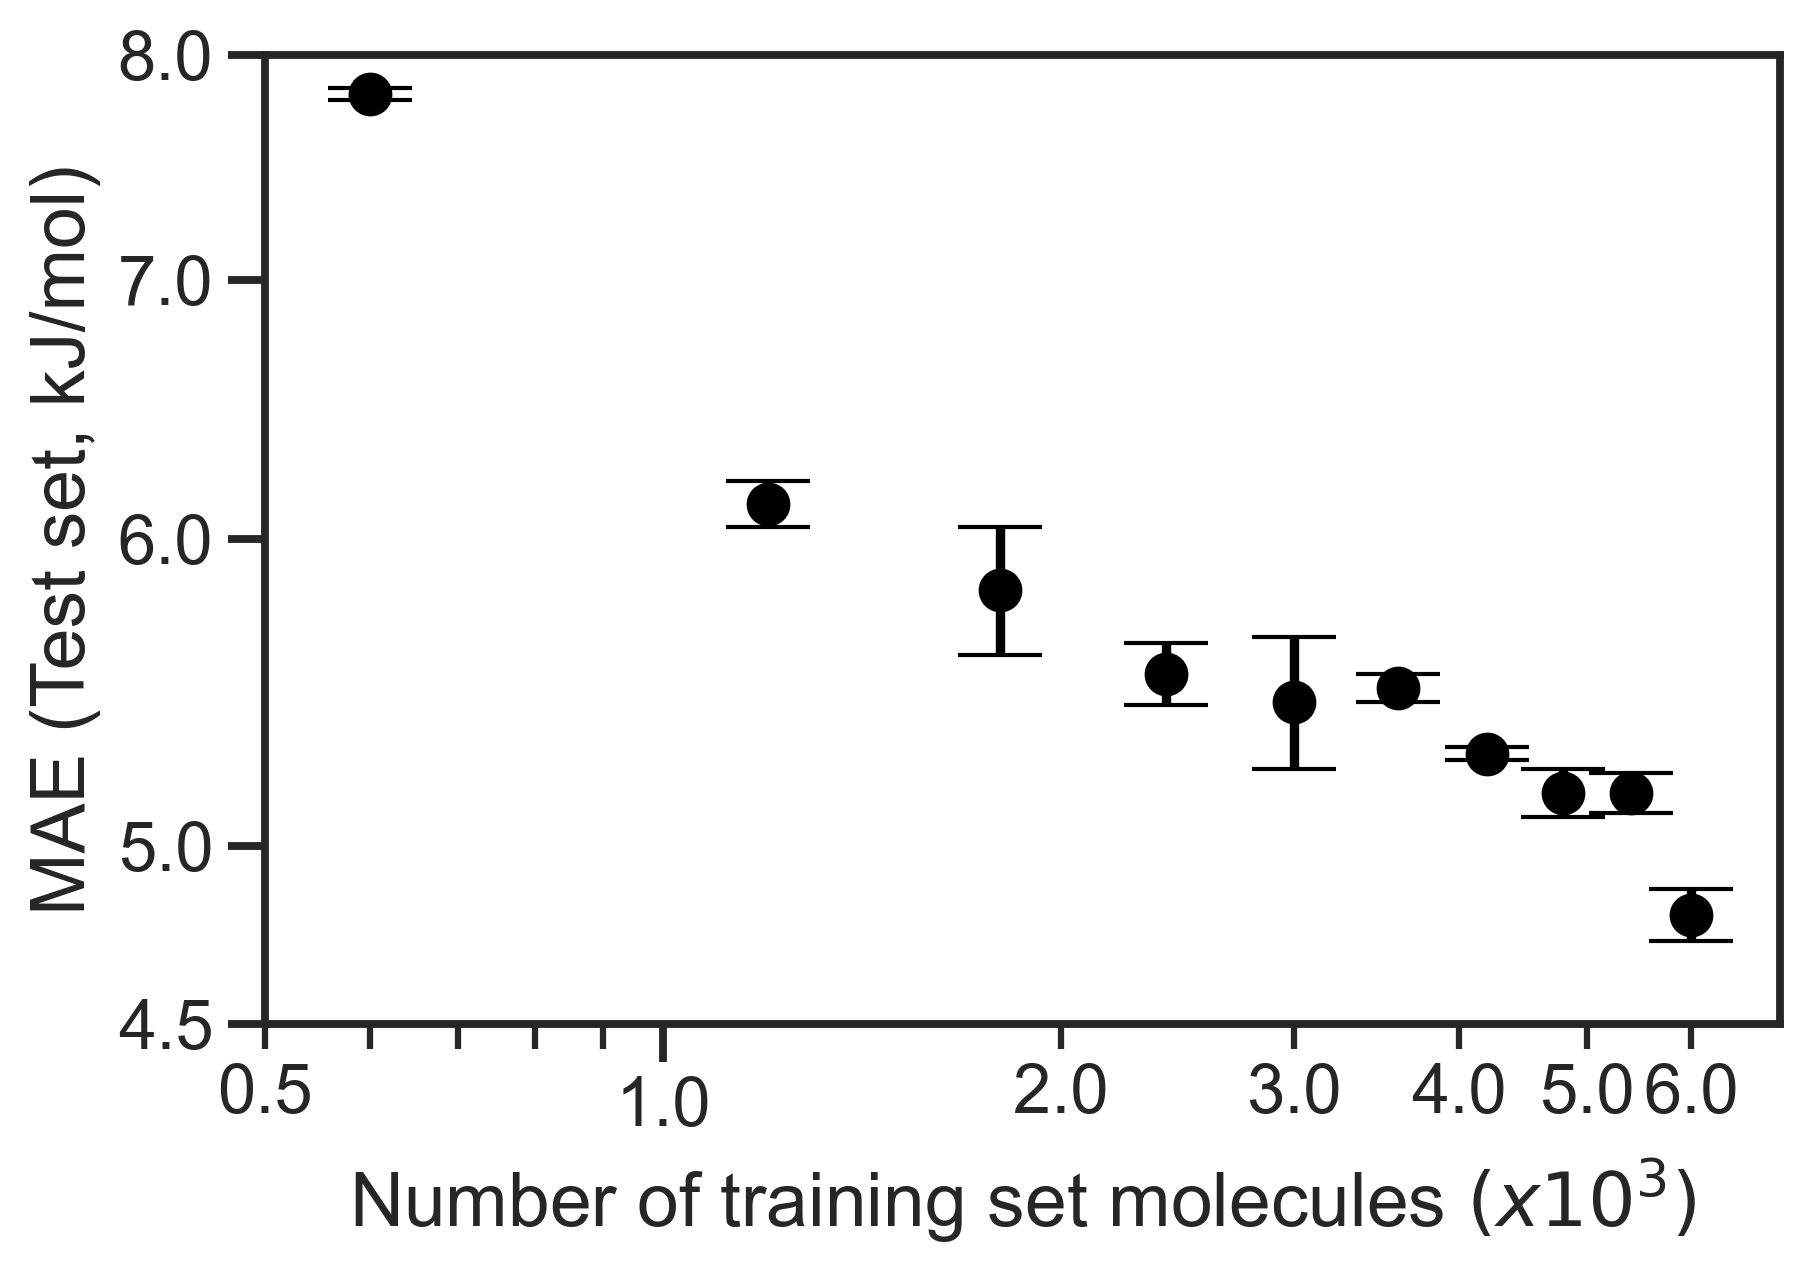

In [5]:
fig,ax = plt.subplots()
#fig.set_figheight(5.8)
#fig.set_figwidth(5.8)
fig.tight_layout()

ax.set_xscale('log')

ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(list(range(500,1001,100)) + list(range(1000,7000,1000))))
ax.xaxis.set_minor_formatter(matplotlib.ticker.FixedFormatter(['0.5','','','','','2.0','3.0','4.0','5.0','6.0']))

ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1000]))
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(['1.0']))

ax.set_xlim([500,7000])


ax.set_yscale('log')
ax.set_yticks([4.5,5.0,6.0,7.0,8.0])
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylim([4.5,8.0])

matplotlib.rcParams.update({'errorbar.capsize': 10})
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 20})
num_data, avg, std = df['N_molecule(Train)'], df['avg_test_set_MAE'], df['std_test_set_MAE']

plt.scatter(num_data,avg, color='black')
plt.errorbar(num_data, avg, yerr=std, ls = 'none', color='black')

plt.xlabel('Number of training set molecules $(x 10^3)$')
plt.ylabel('MAE (Test set, kJ/mol)')